In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris = iris.drop('Id', axis=1)

In [4]:
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [5]:
import matplotlib.pyplot as plt

### Sépalo - Longitud vs. Ancho

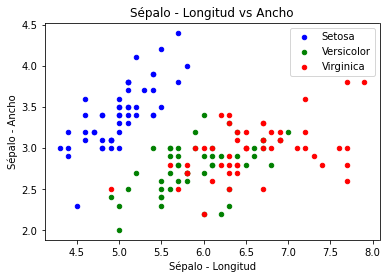

In [6]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

### Petalo - Longitud vs. Ancho


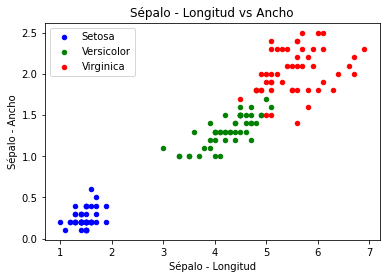

In [7]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

### Aplicación de algoritmos de Machine learning

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X = np.array(iris.drop(['Species'], 1))
y = np.array(iris['Species'])

C:\Users\PC\AppData\Local\Temp/ipykernel_6260/3027044932.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(iris.drop(['Species'], 1))


#### Modelo de regresión logística:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)

print('Precisión de regresión logistica: {}'.format(algoritmo.score(X_train, y_train)))

Precisión de regresión logistica: 0.9666666666666667


#### Modelo de máquinas de vectores de soporte:

In [11]:
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)

print('Precisión de máquinas de vectores de soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión de máquinas de vectores de soporte: 0.975


#### Modelo de vecinos más cercanos:

In [12]:
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)

print('Precisión de vecinos más cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión de vecinos más cercanos: 0.975


#### Modelo de arboles de decisión clasificación:

In [13]:
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)

print('Precisión de arboles de decisión clasificaciónsepalo = iris[['SepalLengthCm','SepalWidthCm','Species']]: {}'.format(algoritmo.score(X_train, y_train)))

Precisión de arboles de decisión clasificación: 1.0


###### Acá el resultado es igual a 1, es decir que este modelo es perfecto, por lo que sería el ideal para realizar las próximas predicciones.

### Nuevo modelo que solo evalúa los datos del sépalo y no del petalo:

In [15]:
sepalo = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [16]:
X_sepalo = np.array(sepalo.drop(['Species'], 1))
y_sepalo = np.array(sepalo['Species'])

C:\Users\PC\AppData\Local\Temp/ipykernel_6260/1466970224.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_sepalo = np.array(sepalo.drop(['Species'], 1))


In [18]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2)

print('Son {} datos del sépalo para entrenamiento y {} datos sépalo para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos del sépalo para entrenamiento y 30 datos sépalo para prueba


#### Modelo de regresión logística:

In [20]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)

print('Precisión Regresión Logística - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Regresión Logística - Sépalo: 0.8


#### Modelo de Máquinas de Vectores de Soporte:

In [22]:
algoritmo = SVC()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)

print('Precisión Máquinas de Vectores de Soporte - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Máquinas de Vectores de Soporte - Sépalo: 0.8166666666666667


###### El resultado mejoró comparándolo con el anterior algoritmo

#### Modelo de vecinos más cercanos:

In [23]:
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)

print('Precisión Vecinos más Cercanos - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Vecinos más Cercanos - Sépalo: 0.8166666666666667


#### Modelo de árboles de decisión clasificación

In [24]:
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_s, y_train_s)
Y_pred = algoritmo.predict(X_test_s)

print('Precisión Árboles de Decisión Clasificación - Sépalo: {}'.format(algoritmo.score(X_train_s, y_train_s)))

Precisión Árboles de Decisión Clasificación - Sépalo: 0.9416666666666667


##### Este es el mejor de los resultados, por lo que este es el mejor modelo de todos.

### Nuevo modelo que evalúa los datos correspondientes al pétalo (longitud, ancho y la columna de especies, que sería la etiqueta):

In [25]:
petalo = iris[['PetalLengthCm','PetalWidthCm','Species']]

X_petalo = np.array(petalo.drop(['Species'], 1))
y_petalo = np.array(petalo['Species'])

C:\Users\PC\AppData\Local\Temp/ipykernel_6260/883150712.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_petalo = np.array(petalo.drop(['Species'], 1))


In [27]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_petalo, y_petalo, test_size=0.2)
print('Son {} datos de pétalo para entrenamiento y {} datos de pétalo para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 120 datos de pétalo para entrenamiento y 30 datos de pétalo para prueba


#### Modelo de regresión logística

In [28]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)

print('Precisión Regresión Logística - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Regresión Logística - Pétalo: 0.9583333333333334


#### Modelo de máquinas de vectores de soporte

In [29]:
algoritmo = SVC()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)

print('Precisión Máquinas de Vectores de Soporte - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Máquinas de Vectores de Soporte - Pétalo: 0.9333333333333333


#### Modelo de vecinos más cercanos

In [30]:
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)

print('Precisión Vecinos más Cercanos - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Vecinos más Cercanos - Pétalo: 0.9666666666666667


#### Modelo de árboles de decisión clasificación

In [31]:
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train_p, y_train_p)
Y_pred = algoritmo.predict(X_test_p)

print('Precisión Árboles de Decisión Clasificación - Pétalo: {}'.format(algoritmo.score(X_train_p, y_train_p)))

Precisión Árboles de Decisión Clasificación - Pétalo: 0.9916666666666667


##### La precisión de este algoritmo es el mejor resultado de todos los algoritmos que evaluamos con estos datos.

### En conclusión, se construyeron varios modelos con tres conjuntos de datos, siendo el modelo construido con el algoritmo de Árbol de Decisión Clasificación el que obtuvo los mejores resultados en cuanto a la precisión.